In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot as plt

np.random.seed(seed = 42)

In [ ]:
data = pd.read_csv("/content/train.csv")

# Extract names of each column (using pandas)
headers = np.array(list(data.columns.values))
names = headers[2:]
y = data["Output"]
X = pd.DataFrame(data,columns=names)

KeyError: ignored

In [ ]:
data = pd.read_csv("/content/train.csv")
data

,0,1,0.4337,0.7431,0.9390,0.7541,0.9035,0.7943,0.2622,0.5901,...,0.5696,0.6407,0.7027,0.7163,0.9954,0.8303,0.1641,0.7893,0.7533,0.2925
0,0,2.0,0.7859,0.1925,0.9024,0.8108,0.2016,0.9649,0.2445,0.8934,...,0.4259,0.7456,0.5750,0.7947,0.4663,0.4303,0.3643,0.0558,0.1330,0.0295
1,0,3.0,0.0512,0.9633,0.1423,0.8404,0.6654,0.4348,0.5751,0.8067,...,0.4753,0.5449,0.8531,0.6337,0.8807,0.2560,0.0597,0.5751,0.7797,0.8544
2,0,4.0,0.0413,0.1588,0.1675,0.0971,0.2918,0.1970,0.0971,0.2039,...,0.7959,0.5306,0.3109,0.2726,0.3298,0.4658,0.7479,0.8747,0.2677,0.3816
3,0,5.0,0.7042,0.4724,0.3901,0.2793,0.2522,0.1933,0.2694,0.4110,...,0.2474,0.5711,0.5686,0.6575,0.1447,0.5774,0.4022,0.6753,0.8371,0.6748
4,0,6.0,0.9538,0.3029,0.4227,0.7774,0.5194,0.7531,0.4816,0.9918,...,0.2433,0.2040,0.1013,0.6044,0.9570,0.8958,0.8006,0.5282,0.4132,0.4582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25120,2283,9.0,0.7164,0.5744,0.1996,0.6964,0.4741,0.5438,0.4233,0.6209,...,0.7151,0.7561,0.8085,0.2463,0.1503,0.9735,0.0498,0.4612,0.7787,0.7463
25121,2283,10.0,0.0214,0.8792,0.8980,0.9968,0.7529,0.8854,0.7132,0.3273,...,0.5365,0.8204,0.6492,0.5126,0.5590,0.6153,0.1765,0.2640,0.3726,0.4228
25122,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25123,2284,1.0,0.3630,0.3461,0.4213,0.7730,0.1248,0.1163,0.7431,0.9528,...,0.7092,0.6808,0.5109,0.4909,0.0519,0.5674,0.9762,0.8210,0.1654,0.4888


In [ ]:
df1 = pd.read_csv("/content/1.csv", header = None)
df2 = pd.read_csv("/content/2.csv", header = None)
df3 = pd.read_csv("/content/3.csv", header = None)
df4 = pd.read_csv("/content/4.csv", header = None)

In [ ]:
df1=df1.drop(index = 0)
df2=df2.drop(index = 0)
df3=df3.drop(index = 0)
df4=df4.drop(index = 0)

In [ ]:
data = pd.concat([df1,df2,df3,df4], axis = 1)

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
1,0,1.0,0.4337,0.7431,0.939,0.7541,0.9035,0.7943,0.2622,0.5901,...,0.2827,0.1162,0.3238,0.905,0.2084,0.2688,0.3755,0.9474,0.0612,0.0
2,0,2.0,0.7859,0.1925,0.9024,0.8108,0.2016,0.9649,0.2445,0.8934,...,0.9898,0.9611,0.2367,0.297,0.5353,0.9938,0.5797,0.6516,0.2664,0.0
3,0,3.0,0.0512,0.9633,0.1423,0.8404,0.6654,0.4348,0.5751,0.8067,...,0.6434,0.4735,0.268,0.9413,0.5229,0.8591,0.9311,0.484,0.0957,0.0
4,0,4.0,0.0413,0.1588,0.1675,0.0971,0.2918,0.197,0.0971,0.2039,...,0.9549,0.6287,0.471,0.5305,0.9662,0.9153,0.1227,0.4397,0.1833,0.0
5,0,5.0,0.7042,0.4724,0.3901,0.2793,0.2522,0.1933,0.2694,0.411,...,0.1863,0.3474,0.3129,0.7503,0.8748,0.5076,0.7052,0.4522,0.9273,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
1,0,1.0,0.4337,0.7431,0.939,0.7541,0.9035,0.7943,0.2622,0.5901,...,0.6407,0.7027,0.7163,0.9954,0.8303,0.1641,0.7893,0.7533,0.2925,1.0
2,0,2.0,0.7859,0.1925,0.9024,0.8108,0.2016,0.9649,0.2445,0.8934,...,0.7456,0.575,0.7947,0.4663,0.4303,0.3643,0.0558,0.133,0.0295,1.0
3,0,3.0,0.0512,0.9633,0.1423,0.8404,0.6654,0.4348,0.5751,0.8067,...,0.5449,0.8531,0.6337,0.8807,0.256,0.0597,0.5751,0.7797,0.8544,1.0
4,0,4.0,0.0413,0.1588,0.1675,0.0971,0.2918,0.197,0.0971,0.2039,...,0.5306,0.3109,0.2726,0.3298,0.4658,0.7479,0.8747,0.2677,0.3816,1.0
5,0,5.0,0.7042,0.4724,0.3901,0.2793,0.2522,0.1933,0.2694,0.411,...,0.5711,0.5686,0.6575,0.1447,0.5774,0.4022,0.6753,0.8371,0.6748,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11518,5234,2.0,0.0001,0.5861,0.9558,0.0581,0.346,0.8378,0.3595,0.4915,...,0.5331,0.7554,0.7975,0.5522,0.2521,0.9704,0.4642,0.6211,0.5454,1.0
11519,5234,3.0,0.7255,0.2268,0.7441,0.8172,0.4259,0.3025,0.8174,0.9607,...,0.8869,0.2147,0.1167,0.3714,0.3948,0.6691,0.8533,0.1502,0.4154,1.0
11520,5234,4.0,0.4054,0.3511,0.3857,0.8696,0.9721,0.8799,0.5439,0.1477,...,0.7386,0.0762,0.1355,0.5368,0.4226,0.2527,0.4237,0.586,0.3694,1.0
11521,5234,5.0,0.7439,0.9808,0.0385,0.5972,0.0798,0.4027,0.9514,0.3796,...,0.9193,0.9629,0.7511,0.3512,0.0454,0.7027,0.0897,0.1216,0.7869,1.0


In [ ]:
data = pd.concat([df1,df2,df3,df4],)

In [ ]:
data.reset_index(drop=True, inplace=True)
data

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,1.0,0.4337,0.7431,0.939,0.7541,0.9035,0.7943,0.2622,0.5901,...,0.6407,0.7027,0.7163,0.9954,0.8303,0.1641,0.7893,0.7533,0.2925,1.0
1,0,2.0,0.7859,0.1925,0.9024,0.8108,0.2016,0.9649,0.2445,0.8934,...,0.7456,0.575,0.7947,0.4663,0.4303,0.3643,0.0558,0.133,0.0295,1.0
2,0,3.0,0.0512,0.9633,0.1423,0.8404,0.6654,0.4348,0.5751,0.8067,...,0.5449,0.8531,0.6337,0.8807,0.256,0.0597,0.5751,0.7797,0.8544,1.0
3,0,4.0,0.0413,0.1588,0.1675,0.0971,0.2918,0.197,0.0971,0.2039,...,0.5306,0.3109,0.2726,0.3298,0.4658,0.7479,0.8747,0.2677,0.3816,1.0
4,0,5.0,0.7042,0.4724,0.3901,0.2793,0.2522,0.1933,0.2694,0.411,...,0.5711,0.5686,0.6575,0.1447,0.5774,0.4022,0.6753,0.8371,0.6748,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52341,5229,6.0,0.3095,0.6843,0.996,0.6522,0.3761,0.025,0.2235,0.7859,...,0.9062,0.8106,0.7298,0.1951,0.3508,0.7454,0.4398,0.5748,0.6143,0.0
52342,5229,7.0,0.4162,0.6795,0.3208,0.9017,0.225,0.0817,0.2113,0.8581,...,0.3347,0.4278,0.1765,0.0179,0.9405,0.7314,0.8729,0.6998,0.41,0.0
52343,5229,8.0,0.0679,0.0506,0.1554,0.5077,0.5742,0.7185,0.8727,0.2025,...,0.4174,0.0965,0.7313,0.335,0.4126,0.1147,0.6697,0.7892,0.24,0.0
52344,5229,9.0,0.6364,0.6784,0.9202,0.5093,0.3782,0.279,0.526,0.3776,...,0.5307,0.1081,0.5129,0.7651,0.1531,0.2597,0.1825,0.2496,0.991,0.0


In [ ]:
data = data.drop(columns =[27])
data

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0,1.0,0.4337,0.7431,0.939,0.7541,0.9035,0.7943,0.2622,0.5901,...,0.5696,0.6407,0.7027,0.7163,0.9954,0.8303,0.1641,0.7893,0.7533,0.2925
1,0,2.0,0.7859,0.1925,0.9024,0.8108,0.2016,0.9649,0.2445,0.8934,...,0.4259,0.7456,0.575,0.7947,0.4663,0.4303,0.3643,0.0558,0.133,0.0295
2,0,3.0,0.0512,0.9633,0.1423,0.8404,0.6654,0.4348,0.5751,0.8067,...,0.4753,0.5449,0.8531,0.6337,0.8807,0.256,0.0597,0.5751,0.7797,0.8544
3,0,4.0,0.0413,0.1588,0.1675,0.0971,0.2918,0.197,0.0971,0.2039,...,0.7959,0.5306,0.3109,0.2726,0.3298,0.4658,0.7479,0.8747,0.2677,0.3816
4,0,5.0,0.7042,0.4724,0.3901,0.2793,0.2522,0.1933,0.2694,0.411,...,0.2474,0.5711,0.5686,0.6575,0.1447,0.5774,0.4022,0.6753,0.8371,0.6748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52341,5229,6.0,0.3095,0.6843,0.996,0.6522,0.3761,0.025,0.2235,0.7859,...,0.5549,0.9062,0.8106,0.7298,0.1951,0.3508,0.7454,0.4398,0.5748,0.6143
52342,5229,7.0,0.4162,0.6795,0.3208,0.9017,0.225,0.0817,0.2113,0.8581,...,0.3834,0.3347,0.4278,0.1765,0.0179,0.9405,0.7314,0.8729,0.6998,0.41
52343,5229,8.0,0.0679,0.0506,0.1554,0.5077,0.5742,0.7185,0.8727,0.2025,...,0.7467,0.4174,0.0965,0.7313,0.335,0.4126,0.1147,0.6697,0.7892,0.24
52344,5229,9.0,0.6364,0.6784,0.9202,0.5093,0.3782,0.279,0.526,0.3776,...,0.6297,0.5307,0.1081,0.5129,0.7651,0.1531,0.2597,0.1825,0.2496,0.991


In [ ]:
y=data[27]

In [ ]:
X = df_normalized
X

,SampleID,Timepoint,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,...,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21,Sensor22,Sensor23,Sensor24,Sensor25
0,0.000000,1.0,0.4337,0.7431,0.9390,0.7541,0.9035,0.7943,0.2622,0.5901,...,0.5696,0.6407,0.7027,0.7163,0.9954,0.8303,0.1641,0.7893,0.7533,0.2925
1,0.000000,2.0,0.7859,0.1925,0.9024,0.8108,0.2016,0.9649,0.2445,0.8934,...,0.4259,0.7456,0.5750,0.7947,0.4663,0.4303,0.3643,0.0558,0.1330,0.0295
2,0.000000,3.0,0.0512,0.9633,0.1423,0.8404,0.6654,0.4348,0.5751,0.8067,...,0.4753,0.5449,0.8531,0.6337,0.8807,0.2560,0.0597,0.5751,0.7797,0.8544
3,0.000000,4.0,0.0413,0.1588,0.1675,0.0971,0.2918,0.1970,0.0971,0.2039,...,0.7959,0.5306,0.3109,0.2726,0.3298,0.4658,0.7479,0.8747,0.2677,0.3816
4,0.000000,5.0,0.7042,0.4724,0.3901,0.2793,0.2522,0.1933,0.2694,0.4110,...,0.2474,0.5711,0.5686,0.6575,0.1447,0.5774,0.4022,0.6753,0.8371,0.6748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52341,0.999045,6.0,0.3095,0.6843,0.9960,0.6522,0.3761,0.0250,0.2235,0.7859,...,0.5549,0.9062,0.8106,0.7298,0.1951,0.3508,0.7454,0.4398,0.5748,0.6143
52342,0.999045,7.0,0.4162,0.6795,0.3208,0.9017,0.2250,0.0817,0.2113,0.8581,...,0.3834,0.3347,0.4278,0.1765,0.0179,0.9405,0.7314,0.8729,0.6998,0.4100
52343,0.999045,8.0,0.0679,0.0506,0.1554,0.5077,0.5742,0.7185,0.8727,0.2025,...,0.7467,0.4174,0.0965,0.7313,0.3350,0.4126,0.1147,0.6697,0.7892,0.2400
52344,0.999045,9.0,0.6364,0.6784,0.9202,0.5093,0.3782,0.2790,0.5260,0.3776,...,0.6297,0.5307,0.1081,0.5129,0.7651,0.1531,0.2597,0.1825,0.2496,0.9910


In [ ]:
X.columns = names
X

,SampleID,Timepoint,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,...,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21,Sensor22,Sensor23,Sensor24,Sensor25
0,0.000000,1.0,0.4337,0.7431,0.9390,0.7541,0.9035,0.7943,0.2622,0.5901,...,0.5696,0.6407,0.7027,0.7163,0.9954,0.8303,0.1641,0.7893,0.7533,0.2925
1,0.000000,2.0,0.7859,0.1925,0.9024,0.8108,0.2016,0.9649,0.2445,0.8934,...,0.4259,0.7456,0.5750,0.7947,0.4663,0.4303,0.3643,0.0558,0.1330,0.0295
2,0.000000,3.0,0.0512,0.9633,0.1423,0.8404,0.6654,0.4348,0.5751,0.8067,...,0.4753,0.5449,0.8531,0.6337,0.8807,0.2560,0.0597,0.5751,0.7797,0.8544
3,0.000000,4.0,0.0413,0.1588,0.1675,0.0971,0.2918,0.1970,0.0971,0.2039,...,0.7959,0.5306,0.3109,0.2726,0.3298,0.4658,0.7479,0.8747,0.2677,0.3816
4,0.000000,5.0,0.7042,0.4724,0.3901,0.2793,0.2522,0.1933,0.2694,0.4110,...,0.2474,0.5711,0.5686,0.6575,0.1447,0.5774,0.4022,0.6753,0.8371,0.6748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52341,0.999045,6.0,0.3095,0.6843,0.9960,0.6522,0.3761,0.0250,0.2235,0.7859,...,0.5549,0.9062,0.8106,0.7298,0.1951,0.3508,0.7454,0.4398,0.5748,0.6143
52342,0.999045,7.0,0.4162,0.6795,0.3208,0.9017,0.2250,0.0817,0.2113,0.8581,...,0.3834,0.3347,0.4278,0.1765,0.0179,0.9405,0.7314,0.8729,0.6998,0.4100
52343,0.999045,8.0,0.0679,0.0506,0.1554,0.5077,0.5742,0.7185,0.8727,0.2025,...,0.7467,0.4174,0.0965,0.7313,0.3350,0.4126,0.1147,0.6697,0.7892,0.2400
52344,0.999045,9.0,0.6364,0.6784,0.9202,0.5093,0.3782,0.2790,0.5260,0.3776,...,0.6297,0.5307,0.1081,0.5129,0.7651,0.1531,0.2597,0.1825,0.2496,0.9910


In [ ]:
df1=df1.drop(df1.index[0])

In [ ]:
df2=df2.drop(df2.index[0])
df3=df3.drop(df3.index[0])
df4=df4.drop(df4.index[0])

In [ ]:
df2

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
1,1,1.0,0.4013,0.6779,0.9426,0.3566,0.3919,0.0981,0.9805,0.5617,...,0.9158,0.1142,0.1561,0.3578,0.348,0.9472,0.4583,0.9891,0.6206,2.0
2,1,2.0,0.0451,0.998,0.0685,0.7227,0.6657,0.2293,0.124,0.2924,...,0.1631,0.0425,0.3357,0.4578,0.23,0.0897,0.3224,0.3442,0.2458,2.0
3,1,3.0,0.6802,0.641,0.1418,0.1385,0.6301,0.7111,0.1836,0.5769,...,0.168,0.2971,0.8183,0.3627,0.26,0.2846,0.5258,0.3026,0.5692,2.0
4,1,4.0,0.9324,0.5326,0.6589,0.2548,0.8256,0.8534,0.935,0.4666,...,0.865,0.3412,0.9377,0.3999,0.4195,0.3462,0.5679,0.7166,0.1132,2.0
5,1,5.0,0.8794,0.9767,0.3466,0.354,0.228,0.8646,0.2864,0.7606,...,0.0471,0.8735,0.5509,0.6695,0.257,0.5096,0.5345,0.547,0.4473,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11743,5232,4.0,0.2591,0.3214,0.0768,0.5396,0.7609,0.4812,0.1468,0.4576,...,0.8582,0.4439,0.0994,0.651,0.9766,0.5332,0.0954,0.1431,0.7999,2.0
11744,5232,5.0,0.7923,0.1952,0.3834,0.8634,0.2556,0.8239,0.0713,0.5258,...,0.5606,0.1542,0.7919,0.0436,0.6024,0.1066,0.9017,0.0463,0.206,2.0
11745,5232,6.0,0.5015,0.9716,0.7392,0.5456,0.1147,0.4879,0.338,0.2587,...,0.2755,0.8243,0.3852,0.9685,0.6385,0.3926,0.5291,0.7928,0.1333,2.0
11746,5232,7.0,0.5215,0.344,0.1886,0.372,0.3902,0.3946,0.8734,0.3619,...,0.1472,0.0346,0.9749,0.136,0.5281,0.7049,0.3602,0.3524,0.0388,2.0


In [ ]:
df3

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
1,1,10.0,0.376,0.2622,0.5555,0.2837,0.1444,0.7606,0.1316,0.5048,...,0.4128,0.4043,0.6029,0.9818,0.771,0.596,0.9843,0.697,0.8146,3.0
2,2,1.0,0.8912,0.4076,0.8245,0.7026,0.7784,0.4193,0.0786,0.0406,...,0.5904,0.7597,0.162,0.3635,0.7204,0.8827,0.7251,0.0735,0.4344,3.0
3,2,2.0,0.6556,0.8445,0.9791,0.5888,0.5415,0.7938,0.48,0.8979,...,0.7482,0.5427,0.9124,0.3356,0.6929,0.2537,0.926,0.4013,0.3644,3.0
4,2,3.0,0.2383,0.1217,0.1959,0.9121,0.144,0.6303,0.5165,0.9884,...,0.0016,0.9053,0.824,0.6673,0.7639,0.2938,0.3643,0.3066,0.155,3.0
5,2,4.0,0.6486,0.9995,0.4086,0.5234,0.3496,0.7218,0.7616,0.4714,...,0.0313,0.4582,0.7783,0.4079,0.3772,0.4436,0.4096,0.2825,0.2164,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,5233,3.0,0.5716,0.3466,0.3608,0.2402,0.9529,0.7807,0.6099,0.7723,...,0.7857,0.2054,0.3224,0.3225,0.8511,0.4589,0.7075,0.6255,0.5187,3.0
14616,5233,4.0,0.9823,0.9596,0.8875,0.0388,0.4034,0.656,0.6105,0.7501,...,0.8355,0.7949,0.7256,0.4404,0.7742,0.5186,0.1749,0.9796,0.841,3.0
14617,5233,5.0,0.4462,0.8307,0.2999,0.1025,0.405,0.7673,0.0336,0.3646,...,0.1186,0.9202,0.8404,0.5427,0.6713,0.791,0.3269,0.4149,0.4654,3.0
14618,5233,6.0,0.7161,0.1891,0.984,0.891,0.1687,0.7737,0.2861,0.9482,...,0.3834,0.6017,0.0239,0.8503,0.7757,0.4038,0.9689,0.6958,0.2442,3.0


In [ ]:
df4

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
1,6,5.0,0.7305,0.4294,0.5846,0.8909,0.8829,0.7973,0.6044,0.2302,...,0.2827,0.1162,0.3238,0.905,0.2084,0.2688,0.3755,0.9474,0.0612,0.0
2,6,6.0,0.5925,0.9305,0.8022,0.6491,0.8066,0.754,0.3283,0.236,...,0.9898,0.9611,0.2367,0.297,0.5353,0.9938,0.5797,0.6516,0.2664,0.0
3,6,7.0,0.4847,0.8088,0.4839,0.8089,0.705,0.5451,0.3501,0.5842,...,0.6434,0.4735,0.268,0.9413,0.5229,0.8591,0.9311,0.484,0.0957,0.0
4,6,8.0,0.2281,0.9681,0.0383,0.7566,0.5684,0.3047,0.19,0.326,...,0.9549,0.6287,0.471,0.5305,0.9662,0.9153,0.1227,0.4397,0.1833,0.0
5,6,9.0,0.064,0.9625,0.9911,0.9439,0.3953,0.0869,0.1208,0.3634,...,0.1863,0.3474,0.3129,0.7503,0.8748,0.5076,0.7052,0.4522,0.9273,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14454,5229,6.0,0.3095,0.6843,0.996,0.6522,0.3761,0.025,0.2235,0.7859,...,0.9062,0.8106,0.7298,0.1951,0.3508,0.7454,0.4398,0.5748,0.6143,0.0
14455,5229,7.0,0.4162,0.6795,0.3208,0.9017,0.225,0.0817,0.2113,0.8581,...,0.3347,0.4278,0.1765,0.0179,0.9405,0.7314,0.8729,0.6998,0.41,0.0
14456,5229,8.0,0.0679,0.0506,0.1554,0.5077,0.5742,0.7185,0.8727,0.2025,...,0.4174,0.0965,0.7313,0.335,0.4126,0.1147,0.6697,0.7892,0.24,0.0
14457,5229,9.0,0.6364,0.6784,0.9202,0.5093,0.3782,0.279,0.526,0.3776,...,0.5307,0.1081,0.5129,0.7651,0.1531,0.2597,0.1825,0.2496,0.991,0.0


In [ ]:
print(data.describe())

           0      1       2       3       4       5       6       7       8   \
count   52346  52346   52346   52346   52346   52346   52346   52346   52346   
unique   5235     10    9948    9943    9947    9938    9952    9949    9939   
top         0    1.0  0.3337  0.7868  0.4611  0.8478  0.9677  0.0329  0.4185   
freq       10   5235      17      17      17      18      16      15      16   

            9   ...      17      18      19      20      21      22      23  \
count    52346  ...   52346   52346   52346   52346   52346   52346   52346   
unique    9952  ...    9953    9948    9955    9948    9958    9960    9955   
top     0.1605  ...  0.6416  0.1611  0.5326  0.2433  0.0562  0.7472  0.9068   
freq        16  ...      17      16      15      17      15      15      17   

            24      25      26  
count    52346   52346   52346  
unique    9958    9947    9951  
top     0.6527  0.7459  0.7397  
freq        16      16      16  

[4 rows x 27 columns]


In [ ]:
y = y.to_numpy()
y

array(['1.0', '1.0', '1.0', ..., '0.0', '0.0', '0.0'], dtype=object)

In [ ]:
y=y.reshape([1,-1])

In [ ]:
y = y.flatten()
y

array(['1.0', '1.0', '1.0', ..., '0.0', '0.0', '0.0'], dtype=object)

In [ ]:
y.rename(columns = ['Output'], inplace = True)

TypeError: ignored

In [ ]:
y = data[[27]]
y.columns = ['Output']
y

,Output
0,1
1,1
2,1
3,1
4,1
...,...
52341,0
52342,0
52343,0
52344,0


In [ ]:
data.drop(data[27], axis = 1)
data

KeyError: ignored

In [ ]:
df_normalized = data.copy()

In [ ]:
df_normalized = df_normalized.astype(float)

In [ ]:
column = 'SampleID'
df_normalized[column] = df_normalized[column] /df_normalized[column].abs().max()

# view normalized data
display(df_normalized)

,SampleID,Timepoint,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,...,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21,Sensor22,Sensor23,Sensor24,Sensor25
0,0.000000,1.0,0.4337,0.7431,0.9390,0.7541,0.9035,0.7943,0.2622,0.5901,...,0.5696,0.6407,0.7027,0.7163,0.9954,0.8303,0.1641,0.7893,0.7533,0.2925
1,0.000000,2.0,0.7859,0.1925,0.9024,0.8108,0.2016,0.9649,0.2445,0.8934,...,0.4259,0.7456,0.5750,0.7947,0.4663,0.4303,0.3643,0.0558,0.1330,0.0295
2,0.000000,3.0,0.0512,0.9633,0.1423,0.8404,0.6654,0.4348,0.5751,0.8067,...,0.4753,0.5449,0.8531,0.6337,0.8807,0.2560,0.0597,0.5751,0.7797,0.8544
3,0.000000,4.0,0.0413,0.1588,0.1675,0.0971,0.2918,0.1970,0.0971,0.2039,...,0.7959,0.5306,0.3109,0.2726,0.3298,0.4658,0.7479,0.8747,0.2677,0.3816
4,0.000000,5.0,0.7042,0.4724,0.3901,0.2793,0.2522,0.1933,0.2694,0.4110,...,0.2474,0.5711,0.5686,0.6575,0.1447,0.5774,0.4022,0.6753,0.8371,0.6748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52341,0.999045,6.0,0.3095,0.6843,0.9960,0.6522,0.3761,0.0250,0.2235,0.7859,...,0.5549,0.9062,0.8106,0.7298,0.1951,0.3508,0.7454,0.4398,0.5748,0.6143
52342,0.999045,7.0,0.4162,0.6795,0.3208,0.9017,0.2250,0.0817,0.2113,0.8581,...,0.3834,0.3347,0.4278,0.1765,0.0179,0.9405,0.7314,0.8729,0.6998,0.4100
52343,0.999045,8.0,0.0679,0.0506,0.1554,0.5077,0.5742,0.7185,0.8727,0.2025,...,0.7467,0.4174,0.0965,0.7313,0.3350,0.4126,0.1147,0.6697,0.7892,0.2400
52344,0.999045,9.0,0.6364,0.6784,0.9202,0.5093,0.3782,0.2790,0.5260,0.3776,...,0.6297,0.5307,0.1081,0.5129,0.7651,0.1531,0.2597,0.1825,0.2496,0.9910


Text(0.5, 1.0, 'Correlation matrix')

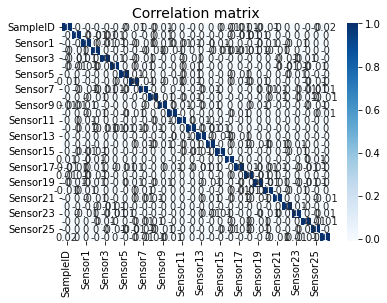

In [ ]:
sns.heatmap(X.assign(target = y).corr().round(2), cmap = 'Blues', annot = True).set_title('Correlation matrix', fontsize = 14)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

rf =  RandomForestClassifier(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True, random_state=42)

rf.fit(X, y)

<ipython-input-104-a6f93e539fc5>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X, y)


RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

In [ ]:


print('Out of bag error:', rf.oob_score_)

Out of bag error: 0.2681198181331907


In [ ]:
names = ["SampleID", "Timepoint", "Sensor1", "Sensor2", "Sensor3", "Sensor4", "Sensor5", "Sensor6", "Sensor7", "Sensor8", "Sensor9", "Sensor10", "Sensor11", "Sensor12", "Sensor13", "Sensor14", "Sensor15", "Sensor16", "Sensor17", "Sensor18", "Sensor19", "Sensor20", "Sensor21", "Sensor22", "Sensor23", "Sensor24", "Sensor25"]

In [ ]:
X.dtypes

SampleID     float64
Timepoint    float64
Sensor1      float64
Sensor2      float64
Sensor3      float64
Sensor4      float64
Sensor5      float64
Sensor6      float64
Sensor7      float64
Sensor8      float64
Sensor9      float64
Sensor10     float64
Sensor11     float64
Sensor12     float64
Sensor13     float64
Sensor14     float64
Sensor15     float64
Sensor16     float64
Sensor17     float64
Sensor18     float64
Sensor19     float64
Sensor20     float64
Sensor21     float64
Sensor22     float64
Sensor23     float64
Sensor24     float64
Sensor25     float64
dtype: object

In [ ]:
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'green') \
       .set_title(title, fontsize = 20)

In [ ]:
X

,SampleID,Timepoint,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,...,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21,Sensor22,Sensor23,Sensor24,Sensor25
0,0.0,1.0,0.4337,0.7431,0.9390,0.7541,0.9035,0.7943,0.2622,0.5901,...,0.5696,0.6407,0.7027,0.7163,0.9954,0.8303,0.1641,0.7893,0.7533,0.2925
1,0.0,2.0,0.7859,0.1925,0.9024,0.8108,0.2016,0.9649,0.2445,0.8934,...,0.4259,0.7456,0.5750,0.7947,0.4663,0.4303,0.3643,0.0558,0.1330,0.0295
2,0.0,3.0,0.0512,0.9633,0.1423,0.8404,0.6654,0.4348,0.5751,0.8067,...,0.4753,0.5449,0.8531,0.6337,0.8807,0.2560,0.0597,0.5751,0.7797,0.8544
3,0.0,4.0,0.0413,0.1588,0.1675,0.0971,0.2918,0.1970,0.0971,0.2039,...,0.7959,0.5306,0.3109,0.2726,0.3298,0.4658,0.7479,0.8747,0.2677,0.3816
4,0.0,5.0,0.7042,0.4724,0.3901,0.2793,0.2522,0.1933,0.2694,0.4110,...,0.2474,0.5711,0.5686,0.6575,0.1447,0.5774,0.4022,0.6753,0.8371,0.6748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52341,5229.0,6.0,0.3095,0.6843,0.9960,0.6522,0.3761,0.0250,0.2235,0.7859,...,0.5549,0.9062,0.8106,0.7298,0.1951,0.3508,0.7454,0.4398,0.5748,0.6143
52342,5229.0,7.0,0.4162,0.6795,0.3208,0.9017,0.2250,0.0817,0.2113,0.8581,...,0.3834,0.3347,0.4278,0.1765,0.0179,0.9405,0.7314,0.8729,0.6998,0.4100
52343,5229.0,8.0,0.0679,0.0506,0.1554,0.5077,0.5742,0.7185,0.8727,0.2025,...,0.7467,0.4174,0.0965,0.7313,0.3350,0.4126,0.1147,0.6697,0.7892,0.2400
52344,5229.0,9.0,0.6364,0.6784,0.9202,0.5093,0.3782,0.2790,0.5260,0.3776,...,0.6297,0.5307,0.1081,0.5129,0.7651,0.1531,0.2597,0.1825,0.2496,0.9910


In [ ]:
base_imp = imp_df(X.columns, rf.feature_importances_)
base_imp

,feature,feature_importance
0,SampleID,0.042022
1,Sensor12,0.037717
2,Sensor9,0.037675
3,Sensor4,0.037669
4,Sensor23,0.037650
5,Sensor15,0.037639
6,Sensor5,0.037637
7,Sensor18,0.037593
8,Sensor25,0.037546
9,Sensor14,0.037473


In [ ]:
X

,SampleID,Timepoint,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,...,Sensor16,Sensor17,Sensor18,Sensor19,Sensor20,Sensor21,Sensor22,Sensor23,Sensor24,Sensor25
0,0.000000,1.0,0.4337,0.7431,0.9390,0.7541,0.9035,0.7943,0.2622,0.5901,...,0.5696,0.6407,0.7027,0.7163,0.9954,0.8303,0.1641,0.7893,0.7533,0.2925
1,0.000000,2.0,0.7859,0.1925,0.9024,0.8108,0.2016,0.9649,0.2445,0.8934,...,0.4259,0.7456,0.5750,0.7947,0.4663,0.4303,0.3643,0.0558,0.1330,0.0295
2,0.000000,3.0,0.0512,0.9633,0.1423,0.8404,0.6654,0.4348,0.5751,0.8067,...,0.4753,0.5449,0.8531,0.6337,0.8807,0.2560,0.0597,0.5751,0.7797,0.8544
3,0.000000,4.0,0.0413,0.1588,0.1675,0.0971,0.2918,0.1970,0.0971,0.2039,...,0.7959,0.5306,0.3109,0.2726,0.3298,0.4658,0.7479,0.8747,0.2677,0.3816
4,0.000000,5.0,0.7042,0.4724,0.3901,0.2793,0.2522,0.1933,0.2694,0.4110,...,0.2474,0.5711,0.5686,0.6575,0.1447,0.5774,0.4022,0.6753,0.8371,0.6748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52341,0.999045,6.0,0.3095,0.6843,0.9960,0.6522,0.3761,0.0250,0.2235,0.7859,...,0.5549,0.9062,0.8106,0.7298,0.1951,0.3508,0.7454,0.4398,0.5748,0.6143
52342,0.999045,7.0,0.4162,0.6795,0.3208,0.9017,0.2250,0.0817,0.2113,0.8581,...,0.3834,0.3347,0.4278,0.1765,0.0179,0.9405,0.7314,0.8729,0.6998,0.4100
52343,0.999045,8.0,0.0679,0.0506,0.1554,0.5077,0.5742,0.7185,0.8727,0.2025,...,0.7467,0.4174,0.0965,0.7313,0.3350,0.4126,0.1147,0.6697,0.7892,0.2400
52344,0.999045,9.0,0.6364,0.6784,0.9202,0.5093,0.3782,0.2790,0.5260,0.3776,...,0.6297,0.5307,0.1081,0.5129,0.7651,0.1531,0.2597,0.1825,0.2496,0.9910


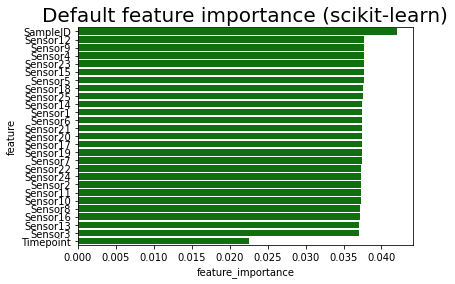

In [ ]:
var_imp_plot(base_imp, 'Default feature importance (scikit-learn)')

In [ ]:
!pip install rfpimp
import rfpimp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10668 sha256=6f90af556fe77a4a782c994cc07deb1e054883dab3b1b62fd358feba4b1b997f
  Stored in directory: /root/.cache/pip/wheels/d9/f2/53/6d8c73011f73fc347598d683ff8b2343605ad43474ae083816
Successfully built rfpimp


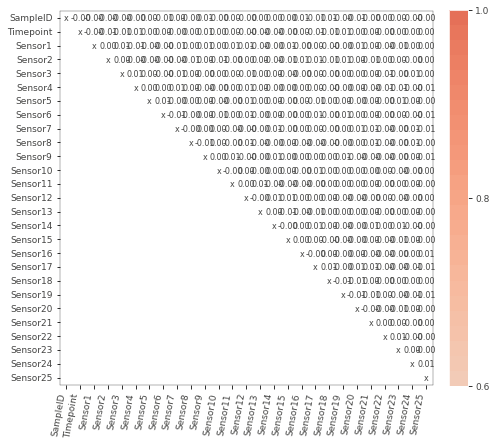

In [ ]:
from rfpimp import plot_corr_heatmap
viz = plot_corr_heatmap(X, figsize=(7,7))
viz.view()

In [ ]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf, X, y):
    return r2_score(y, rf.predict(X))

perm_imp_rfpimp = permutation_importances(rf, X, y, r2)
perm_imp_rfpimp.reset_index(drop = False, inplace = True)

In [ ]:
from rfpimp import *
rf_pimp = RandomForestClassifier(n_estimators=100, n_jobs=-1)
%time I = oob_importances(rf_pimp, X, y)

/usr/local/lib/python3.9/dist-packages/rfpimp.py:409: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_sample, y_sample)


CPU times: user 10.5 s, sys: 47.8 ms, total: 10.6 s
Wall time: 8.42 s


In [ ]:
%time I = cv_importances(rf_pimp, X, y, k=5)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 

In [ ]:
%time I = dropcol_importances(rf_pimp, X, y)

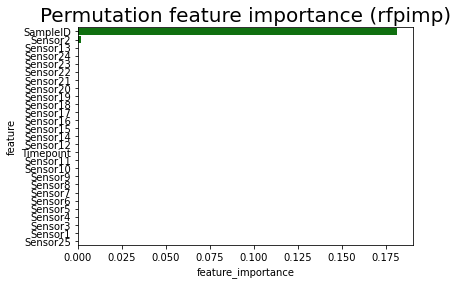

In [ ]:
var_imp_plot(perm_imp_rfpimp, 'Permutation feature importance (rfpimp)')

In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=109745c46ff32757368527a4c6828b4c1fea3de3edf99be6cba82af242c743fe
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5


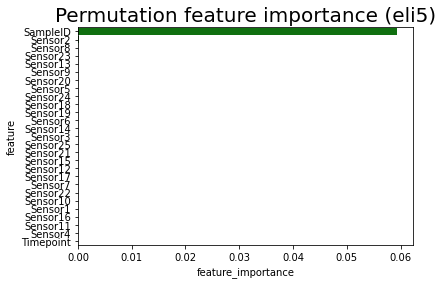

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf, cv = None, refit = False, n_iter = 50).fit(X, y)
perm_imp_eli5 = imp_df(X.columns, perm.feature_importances_)
var_imp_plot(perm_imp_eli5, 'Permutation feature importance (eli5)')

In [ ]:
eli5.show_weights(perm)

Weight,Feature
0.0593 ± 0.0016,x0
0.0001 ± 0.0001,x3
0.0001 ± 0.0001,x9
0.0001 ± 0.0001,x24
0.0000 ± 0.0001,x14
0.0000 ± 0.0001,x10
0.0000 ± 0.0000,x21
0.0000 ± 0.0000,x6
0.0000 ± 0.0000,x25
0.0000 ± 0.0000,x19


In [ ]:
from sklearn.base import clone

def drop_col_feat_imp(model, X_train, y_train, random_state = 42):

    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    # list for storing feature importances
    importances = []

    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)

    importances_df = imp_df(X_train.columns, importances)
    return importances_df

CPU times: user 22min 39s, sys: 1.87 s, total: 22min 41s
Wall time: 13min 30s
      feature  feature_importance
0    Sensor15            0.000869
1     Sensor7            0.000866
2    Sensor21            0.000609
3    SampleID            0.000603
4     Sensor4            0.000583
5     Sensor6            0.000560
6     Sensor3            0.000554
7    Sensor25            0.000394
8    Sensor17            0.000387
9    Sensor23            0.000383
10   Sensor18            0.000355
11    Sensor8            0.000258
12   Sensor11            0.000255
13   Sensor20            0.000249
14   Sensor10            0.000210
15   Sensor19            0.000203
16   Sensor13            0.000156
17   Sensor16            0.000132
18   Sensor12            0.000107
19  Timepoint            0.000092
20   Sensor14            0.000006
21    Sensor5           -0.000080
22    Sensor9           -0.000103
23   Sensor22           -0.000112
24    Sensor1           -0.000115
25    Sensor2           -0.000460
26  

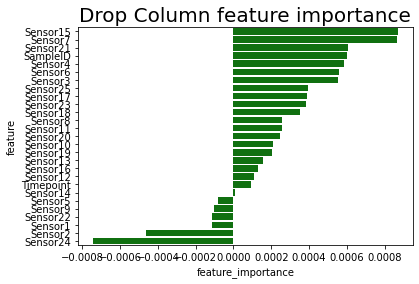

In [ ]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 42)

rf_1 =  RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True, random_state=42)

rf_1.fit(X_train, y_train)
%time drop_imp = drop_col_feat_imp(rf_1, X_train, y_train)
print(drop_imp)
var_imp_plot(drop_imp, 'Drop Column feature importance')

In [ ]:
for i in range (0,52346):
  if y[i] == '0.0':
    y[i] = int(0)
  elif y[i] == '1.0':
    y[i] = int(1)
  elif y[i] == '2.0':
    y[i] = int(2)
  elif y[i] == '3.0':
    y[i] = int(3)

KeyError: ignored

In [ ]:
y = y.astype(int)
y

,Output
0,1
1,1
2,1
3,1
4,1
...,...
52341,0
52342,0
52343,0
52344,0


In [ ]:
for element in y:
  element = float(element)
y

ValueError: ignored

In [ ]:
type(y[1])

int

In [ ]:
X = X.astype(float)

[16:31:29] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "oob_score" } are not used.

[0.09607168 0.02474542 0.03364805 0.03419907 0.03343186 0.03429361
 0.0344215  0.03475623 0.03332678 0.03304452 0.03591283 0.03548979
 0.03516903 0.03544264 0.03603999 0.03410829 0.03690046 0.03528532
 0.03585355 0.03662675 0.03645666 0.03602191 0.03637404 0.03515558
 0.03658838 0.03444674 0.03618932]


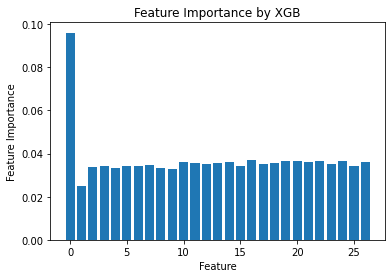

In [ ]:
xgb = XGBClassifier(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True, random_state=42)
xgb.fit(X, y)
# feature importance
print(xgb.feature_importances_)

# plot using default scikit learn feature selection
plt.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
plt.title("Feature Importance by XGB")
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.show()

In [ ]:
X = X.astype(float)
X.dtypes

SampleID     float64
Timepoint    float64
Sensor1      float64
Sensor2      float64
Sensor3      float64
Sensor4      float64
Sensor5      float64
Sensor6      float64
Sensor7      float64
Sensor8      float64
Sensor9      float64
Sensor10     float64
Sensor11     float64
Sensor12     float64
Sensor13     float64
Sensor14     float64
Sensor15     float64
Sensor16     float64
Sensor17     float64
Sensor18     float64
Sensor19     float64
Sensor20     float64
Sensor21     float64
Sensor22     float64
Sensor23     float64
Sensor24     float64
Sensor25     float64
dtype: object

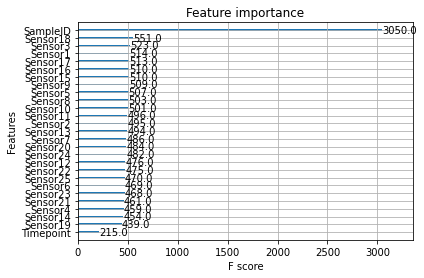

In [ ]:
plot_importance(xgb)
plt.show()